In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

from sklearn.decomposition import PCA

import statsmodels.api as sm
from scipy.stats import norm, shapiro, ttest_rel, wilcoxon

from typing import Optional, Tuple, List, Self

from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

In [2]:
from model.Rebar import RoundRebar
from model.GapFinder import GapFinder

In [3]:
data = np.load('data.npz')['vol']

Lets test the model for stability

The rebar was found, separated from noise, coordinates and p-value for defects were obtained

In [4]:
rebar = RoundRebar(
    radius=4,
    points=np.array([
        [47, 178, 81],
        [101, 175, 80], 
        [250, 168, 83], 
        [350, 163, 86],
        [517, 152, 88]
    ]),
    volume_shape=data.shape,
    xlim=(20, 570),
)
rebar.dir_validate()
print(rebar.direction)

model = GapFinder().fit(data, rebar)
model.predict()

Direction RMSE: 1.035
[ 0.99839089 -0.05406368  0.01710995]
Wilcoxon stat: 130834.0, p-value: 0.000. Distributions are separable - Rebar is clearly distinguishable from noise


[      x      y     z  p_val_mad_snr_v5_p95
 0  24.0  179.0  79.0              0.017135,
       x      y     z  p_val_mad_snr_v5_p95
 1  34.0  179.0  79.0              0.006980
 2  35.0  178.0  79.0              0.046243,
        x      y     z  p_val_mad_snr_v5_p95
 3  110.0  174.0  81.0              0.009013
 4  111.0  174.0  81.0              0.011890
 5  112.0  174.0  81.0              0.025592
 6  113.0  174.0  81.0              0.003150
 7  114.0  174.0  81.0              0.027198,
        x      y     z  p_val_mad_snr_v5_p95
 8  254.0  167.0  83.0              0.029777,
         x      y     z  p_val_mad_snr_v5_p95
 9   318.0  163.0  84.0              0.039238
 10  319.0  163.0  84.0              0.024225
 11  320.0  163.0  84.0              0.022229,
         x      y     z  p_val_mad_snr_v5_p95
 12  361.0  161.0  85.0              0.045581
 13  362.0  161.0  85.0              0.048434
 14  363.0  161.0  85.0              0.013521,
         x      y     z  p_val_mad_snr_v5_p95


When changing the model's hyperparameters, the response changed significantly, some areas appeared and disappeared, and the p-values ​​changed

In [5]:
rebar = RoundRebar(
    radius=4,
    points=np.array([
        [47, 178, 81],
        [101, 175, 80], 
        [250, 168, 83], 
        [350, 163, 86],
        [517, 152, 88]
    ]),
    volume_shape=data.shape,
    xlim=(20, 570),
)
rebar.dir_validate()
print(rebar.direction)

model = GapFinder(defect_probs='pval', vol_mode='v3', stat='mean').fit(data, rebar)
model.predict()

Direction RMSE: 1.035
[ 0.99839089 -0.05406368  0.01710995]
t-test stat: 14.50111605895096, p-value: 0.000. Distributions are separable - Rebar is clearly distinguishable from noise
Shapiro p-val: 0.11685 >= 0.05, probability estimates will be correct


[      x      y     z  p_val_snr_v3_mean
 0  24.0  179.0  79.0           0.020049,
       x      y     z  p_val_snr_v3_mean
 1  33.0  179.0  79.0           0.017164
 2  34.0  179.0  79.0           0.023106
 3  35.0  178.0  79.0           0.037236,
        x      y     z  p_val_snr_v3_mean
 4  114.0  174.0  81.0           0.037126,
        x      y     z  p_val_snr_v3_mean
 5  319.0  163.0  84.0           0.018359
 6  320.0  163.0  84.0           0.027317,
        x      y     z  p_val_snr_v3_mean
 7  362.0  161.0  85.0           0.024779,
         x      y     z  p_val_snr_v3_mean
 8   368.0  160.0  85.0           0.031465
 9   370.0  160.0  85.0           0.003354
 10  371.0  160.0  85.0           0.011889
 11  372.0  160.0  85.0           0.034366,
         x      y     z  p_val_snr_v3_mean
 12  403.0  159.0  86.0           0.037154
 13  404.0  159.0  86.0           0.047499,
         x      y     z  p_val_snr_v3_mean
 14  523.0  152.0  88.0           0.046284,
         x      y     

As the rebar radius increases, the signal is still separated from noise, but the number of defects increases - this is due to the influence of noise

In [6]:
rebar = RoundRebar(
    radius=5,
    points=np.array([
        [47, 178, 81],
        [101, 175, 80], 
        [250, 168, 83], 
        [350, 163, 86],
        [517, 152, 88]
    ]),
    volume_shape=data.shape,
    xlim=(20, 570),
)
rebar.dir_validate()
print(rebar.direction)

model = GapFinder(defect_probs='pval', vol_mode='v3', stat='mean').fit(data, rebar)
model.predict()

Direction RMSE: 1.035
[ 0.99839089 -0.05406368  0.01710995]
Wilcoxon stat: 141249.0, p-value: 0.000. Distributions are separable - Rebar is clearly distinguishable from noise
Shapiro p-val: 0.48445 >= 0.05, probability estimates will be correct


[      x      y     z  p_val_snr_v3_mean
 0  33.0  179.0  79.0           0.022785
 1  34.0  179.0  79.0           0.036815,
        x      y     z  p_val_snr_v3_mean
 2  113.0  174.0  81.0           0.014025
 3  114.0  174.0  81.0           0.006700
 4  115.0  174.0  81.0           0.011522,
        x      y     z  p_val_snr_v3_mean
 5  146.0  172.0  81.0           0.027919,
        x      y     z  p_val_snr_v3_mean
 6  319.0  163.0  84.0           0.011334
 7  320.0  163.0  84.0           0.013153,
        x      y     z  p_val_snr_v3_mean
 8  362.0  161.0  85.0           0.046229,
         x      y     z  p_val_snr_v3_mean
 9   368.0  160.0  85.0           0.046906
 10  369.0  160.0  85.0           0.034451
 11  370.0  160.0  85.0           0.003825
 12  371.0  160.0  85.0           0.025783,
         x      y     z  p_val_snr_v3_mean
 13  389.0  159.0  85.0           0.019782,
         x      y     z  p_val_snr_v3_mean
 14  404.0  159.0  86.0           0.016754
 15  405.0  158.0  86

In [7]:
rebar = RoundRebar(
    radius=12,
    points=np.array([
        [47, 178, 81],
        [101, 175, 80], 
        [250, 168, 83], 
        [350, 163, 86],
        [517, 152, 88]
    ]),
    volume_shape=data.shape,
    xlim=(20, 570),
)
rebar.dir_validate()
print(rebar.direction)

model = GapFinder(defect_probs='pval', vol_mode='v3', stat='mean').fit(data, rebar)
model.predict()

Direction RMSE: 1.035
[ 0.99839089 -0.05406368  0.01710995]
Wilcoxon stat: 132135.0, p-value: 0.000. Distributions are separable - Rebar is clearly distinguishable from noise
Shapiro p-val: 0.41213 >= 0.05, probability estimates will be correct


[      x      y     z  p_val_snr_v3_mean
 0  28.0  179.0  79.0           0.033893
 1  29.0  179.0  79.0           0.035343,
       x      y     z  p_val_snr_v3_mean
 2  37.0  178.0  79.0           0.007286
 3  38.0  178.0  79.0           0.037048
 4  39.0  178.0  79.0           0.022189,
       x      y     z  p_val_snr_v3_mean
 5  62.0  177.0  80.0           0.046891,
       x      y     z  p_val_snr_v3_mean
 6  66.0  177.0  80.0            0.04464,
       x      y     z  p_val_snr_v3_mean
 7  70.0  177.0  80.0           0.040954,
       x      y     z  p_val_snr_v3_mean
 8  81.0  176.0  80.0           0.024592
 9  82.0  176.0  80.0           0.038585,
        x      y     z  p_val_snr_v3_mean
 10  87.0  176.0  80.0           0.026789
 11  88.0  176.0  80.0           0.020874,
         x      y     z  p_val_snr_v3_mean
 12  168.0  171.0  82.0           0.049073
 13  169.0  171.0  82.0           0.022344
 14  170.0  171.0  82.0           0.022482
 15  171.0  171.0  82.0           0.020

If incorrect coordinates are specified, the noise check works successfully

In [8]:
rebar = RoundRebar(
    radius=4,
    points=np.array([
        [47, 183, 81],
        [101, 181, 80], 
        [250, 172, 83], 
        [350, 167, 86],
        [517, 158, 88]
    ]),
    volume_shape=data.shape,
    xlim=(20, 570),
)
rebar.dir_validate()
print(rebar.direction)

model = GapFinder(min_def_size=2, defect_probs='pval', vol_mode='v3', stat='mean').fit(data, rebar)
model.predict()

Direction RMSE: 0.813
[ 0.99839761 -0.0539392   0.01711055]
Wilcoxon stat: 76959.0, p-value: 0.374. Distributions are NOT separable - Rebar signal is indistinguishable from noise
Distributions are NOT separable - Rebar signal is indistinguishable from noise


In [9]:
rebar = RoundRebar(
    radius=4,
    points=np.array([
        [47, 178, 31],
        [101, 175, 30], 
        [250, 168, 33], 
        [350, 163, 36],
        [517, 152, 38]
    ]),
    volume_shape=data.shape,
    xlim=(20, 570),
)
rebar.dir_validate()
print(rebar.direction)

model = GapFinder(min_def_size=2).fit(data, rebar)
model.predict()

Direction RMSE: 1.035
[ 0.99839089 -0.05406368  0.01710995]
t-test stat: -3.4656008047343616, p-value: 1.000. Distributions are NOT separable - Rebar signal is indistinguishable from noise
Distributions are NOT separable - Rebar signal is indistinguishable from noise


For the test, I'll take another rebar and very, very roughly determine its parameters.

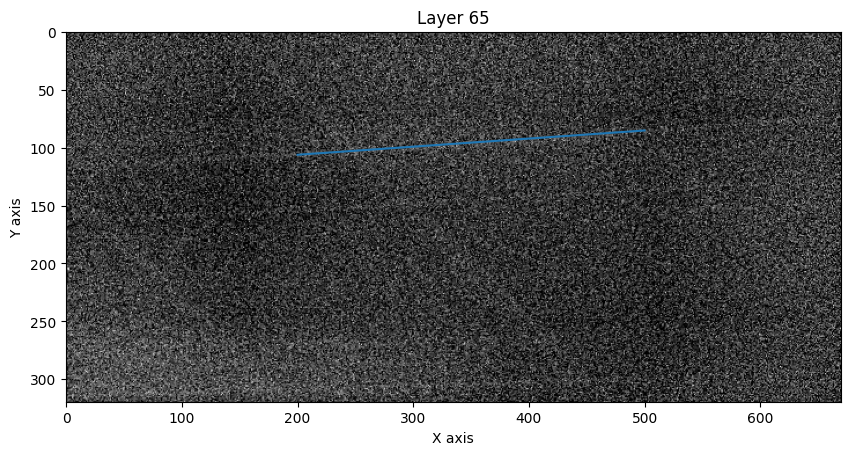

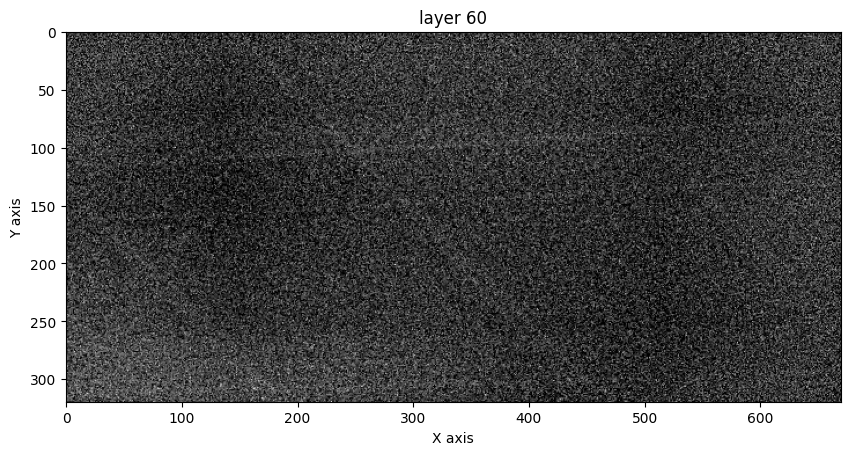

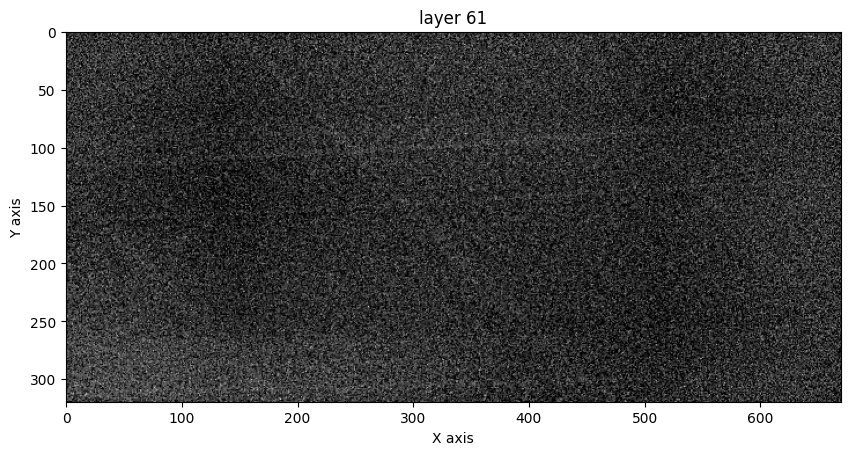

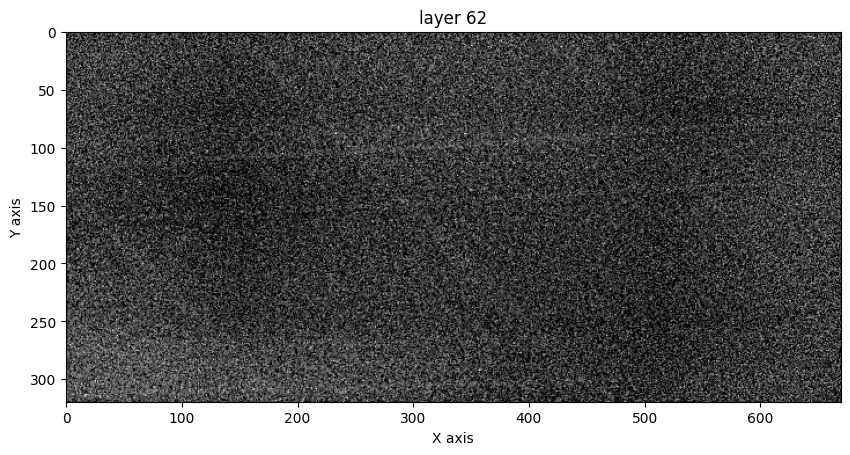

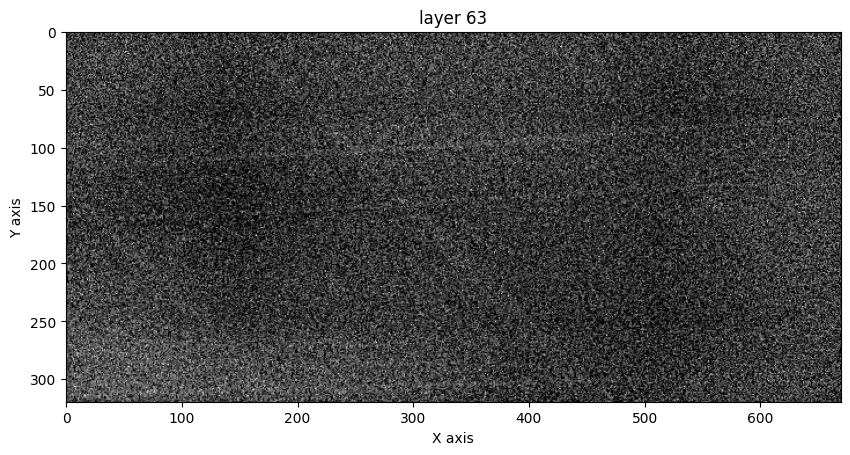

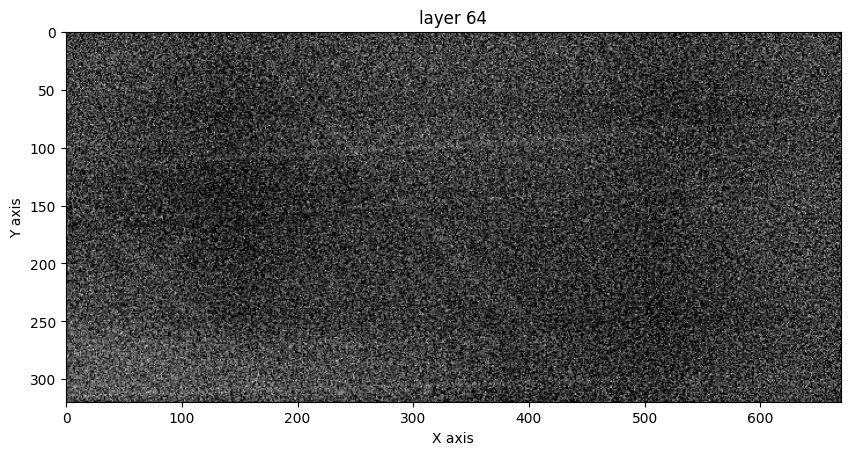

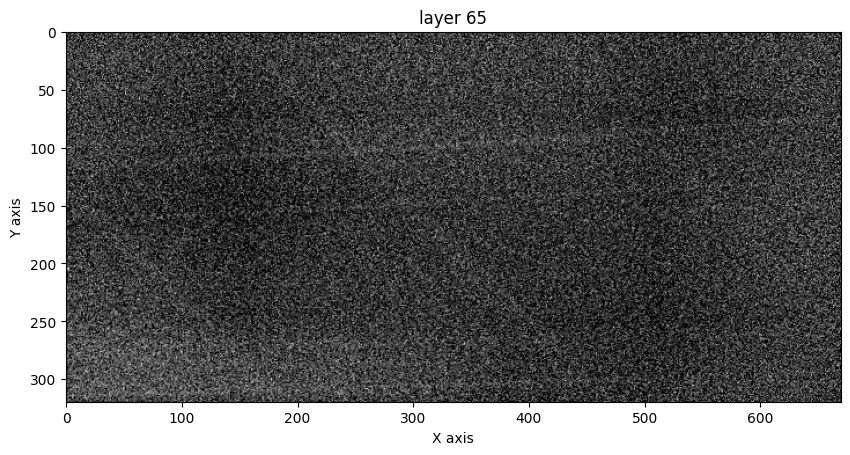

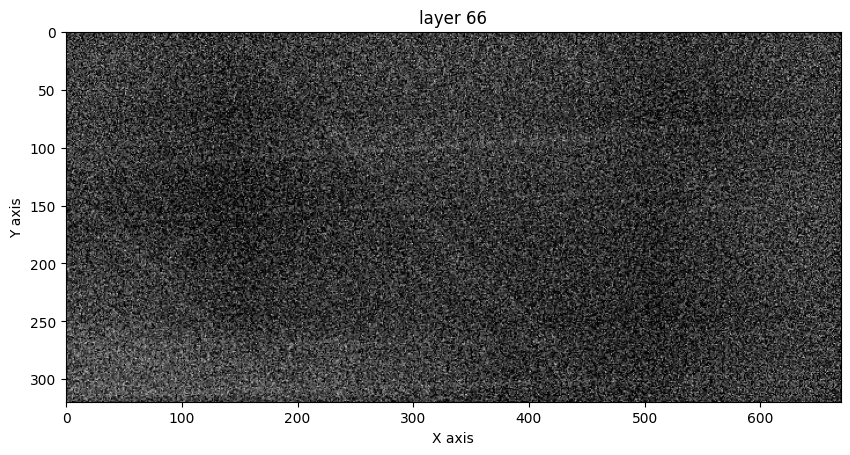

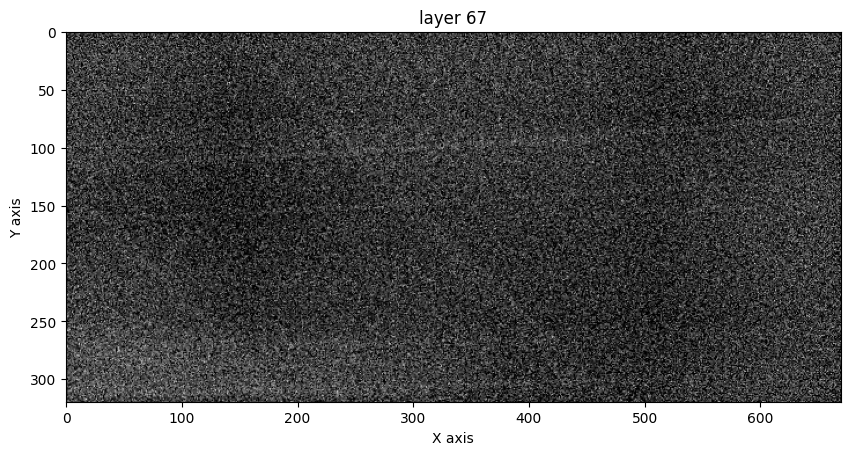

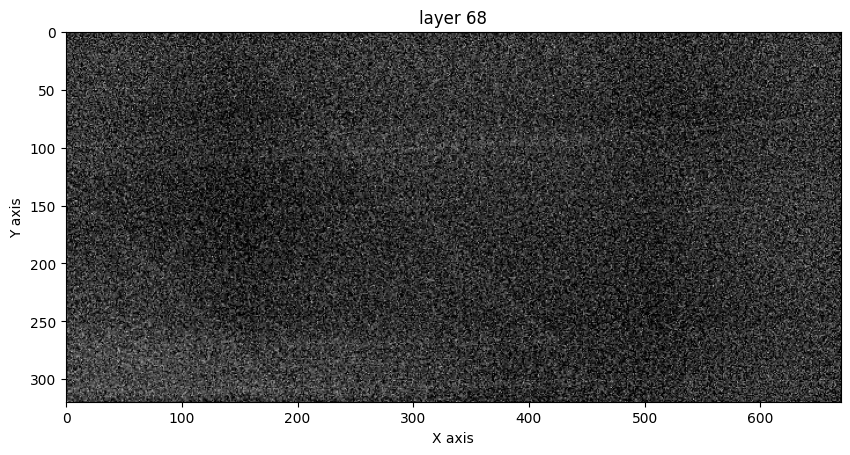

In [10]:
plt.figure(figsize=(10, 20))
plt.imshow(data[:,:, 65], cmap='gray')
plt.plot([200, 500], [106, 85])
plt.title('Layer 65')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

for layer in range(60, 69):
    plt.figure(figsize=(10, 20))
    plt.imshow(data[:,:, layer], cmap='gray')
    plt.title(f"layer {layer}")
    plt.xlabel('X axis')
    plt.ylabel('Y axis')
    plt.show()

In [11]:
rebar = RoundRebar(
    radius=4,
    points=np.array([
        [200, 106, 65],
        [500, 85, 65],
    ]),
    volume_shape=data.shape,
    xlim=(200, 500),
)
rebar.dir_validate()
print(rebar.direction)

model = GapFinder(min_def_size=2).fit(data, rebar)
model.predict()

Direction RMSE: 0.000
[ 0.99755897 -0.06982913  0.        ]
Wilcoxon stat: 41149.0, p-value: 0.000. Distributions are separable - Rebar is clearly distinguishable from noise


[       x     y     z  p_val_mad_snr_v5_p95
 2  314.0  98.0  65.0              0.031705
 3  316.0  97.0  65.0              0.008908
 4  317.0  97.0  65.0              0.040424,
        x     y     z  p_val_mad_snr_v5_p95
 5  343.0  95.0  65.0              0.002219
 6  344.0  95.0  65.0              0.015295
 7  345.0  95.0  65.0              0.007371]

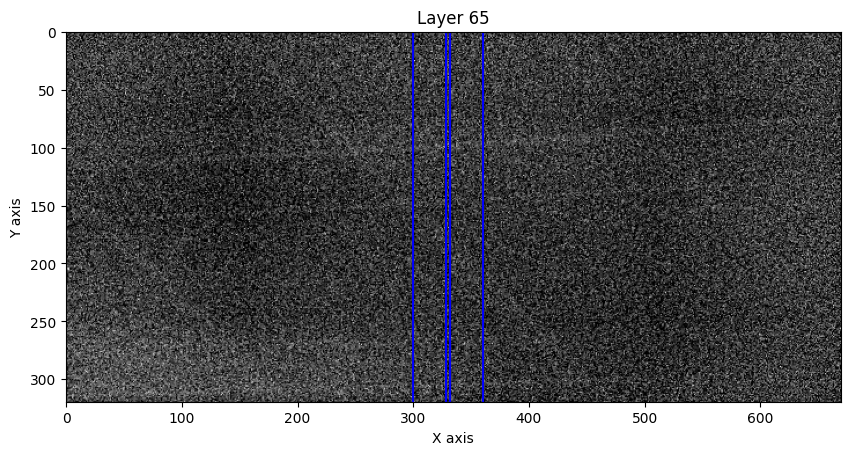

In [12]:
plt.figure(figsize=(10, 20))
plt.imshow(data[:,:, 65], cmap='gray')
plt.title('Layer 65')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.axvline(300, color='blue')
plt.axvline(328, color='blue')

plt.axvline(332, color='blue')
plt.axvline(360, color='blue')

plt.show()

# Conclusion

The constructed model should be further refined.
The main problem remains the correct specification of the rebar parameters, namely the radius and the points along the axis. Automatic estimation of these parameters can be achieved using simple statistical methods by computing statistics within a given volume, selecting regions with elevated signal levels and then estimating the parameters.

At the moment, the model is not sufficiently stable and may change its predictions when hyperparameters are modified or when small changes are made to the rebar parameters.

When performing calculations by cross-sections, it is advisable to move in a direction close to the rebar axis direction (argmax(direction)) in order to keep the cross-sectional area approximately constant. In the current implementation, analysis of rebar whose axis lies in a plane parallel to the ZY plane is not possible due to changes in the cross-sectional plane.

To build more complex models, one could try applying convolutional neural networks, and to mitigate noise, autoencoders that reconstruct the original data from noisy inputs.